In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
mean = 45
std = 15
x = np.random.normal(mean,std,10000)

In [47]:
x

array([43.62849881, 43.81449497, 28.44046503, ..., 47.07629   ,
       49.91993697, 56.62676636])

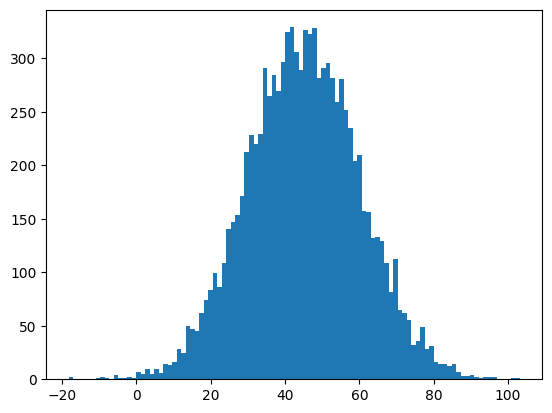

In [48]:
plt.hist(x,bins=100)
plt.show()

In [49]:
marks = np.random.normal(mean,std,(10000,10))

In [50]:
marks = np.clip(marks,5,95).astype(int)

In [51]:
df = pd.DataFrame(marks, columns = [f'Sub-{i+1}' for i in range(10)])

In [52]:
df.head()

,Sub-1,Sub-2,Sub-3,Sub-4,Sub-5,Sub-6,Sub-7,Sub-8,Sub-9,Sub-10
0,53,54,40,70,24,72,5,36,57,49
1,32,36,47,17,50,31,38,13,10,23
2,60,13,19,36,44,58,49,42,62,69
3,26,53,48,39,38,17,55,48,16,37
4,59,72,44,77,22,48,12,42,34,39


In [53]:
result = np.random.randint(0,2,10000)

In [54]:
df['result'] = result

In [55]:
df.head()

,Sub-1,Sub-2,Sub-3,Sub-4,Sub-5,Sub-6,Sub-7,Sub-8,Sub-9,Sub-10,result
0,53,54,40,70,24,72,5,36,57,49,1
1,32,36,47,17,50,31,38,13,10,23,1
2,60,13,19,36,44,58,49,42,62,69,0
3,26,53,48,39,38,17,55,48,16,37,0
4,59,72,44,77,22,48,12,42,34,39,1


In [56]:
df['result'].value_counts()

result
1    5019
0    4981
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

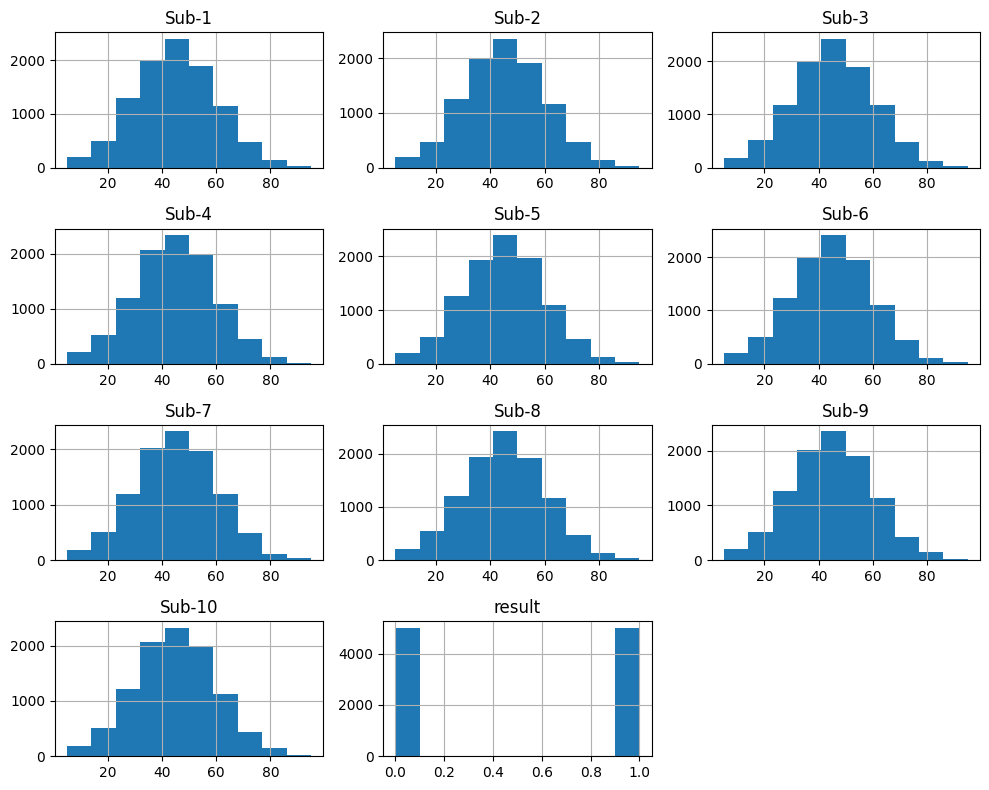

In [57]:
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show

In [58]:
#splitting data
X = df.iloc[:,:10].values
Y = df.iloc[:,-1].values

In [59]:
xTrain, xTest = X[:8000, :].T, X[8000:, :].T
yTrain, yTest = Y[:8000], Y[8000:]

In [60]:
m,n = xTrain.shape

In [61]:
n

8000

In [62]:
m

10

In [63]:
yTrain.shape

(8000,)

In [64]:
#uniform distribution
def init_params():
    W1 = np.random.uniform(low=-.05, high=.05, size=(10, 10)) #yaha kuch change karo taki A2 thik ho jaye
    b1 = np.random.uniform(low=-.05, high=.05, size=(10, 1)) 
    W2 = np.random.uniform(low=-.05, high=.05, size=(10, 10)) 
    b2 = np.random.uniform(low=-.05, high=.05, size=(10, 1)) 
    return W1, b1, W2, b2
W1, b1, W2, b2 = init_params()

In [65]:
W1

array([[-2.30457366e-02, -2.85252430e-02,  1.33563956e-03,
        -1.79190706e-02,  3.21435185e-02, -4.33465812e-02,
         5.27649328e-03,  1.23540830e-02,  4.55671477e-02,
        -4.12803073e-02],
       [-1.14657559e-02,  1.21389882e-02, -2.59531644e-02,
         1.98232221e-02,  9.02249108e-03,  1.29252711e-02,
        -4.24305907e-03, -4.49831969e-02, -7.15630796e-03,
        -4.94891140e-02],
       [ 4.45302262e-02, -2.92455689e-02, -2.17811954e-02,
        -4.39206383e-02, -4.29137956e-02, -2.86642363e-02,
        -4.57365630e-02,  3.80931355e-02,  1.45970716e-02,
        -1.34722984e-02],
       [ 2.82075099e-02,  2.73245211e-03,  2.32626626e-02,
         1.04444363e-02,  7.56398667e-03, -2.80875793e-02,
         5.40168905e-03,  1.07414114e-02, -2.69664433e-02,
         4.10340420e-02],
       [ 4.91609006e-02,  2.41095853e-02,  2.05140829e-02,
        -3.97048814e-02, -1.12061366e-02,  1.73048564e-02,
         6.16508478e-04, -4.84852133e-02, -2.33330446e-02,
        -4.

In [66]:
def sigmoid(Z):
    ''' It returns 1/(1+exp(-x)). where the values lies between zero and one '''
    return 1/(1+np.exp(-Z))

def sigmoid_derivative(Z):
    return sigmoid(Z)*(1-sigmoid(Z))


def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [67]:
def ReLU_deriv(Z):
    return Z > 0

In [68]:
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    #A1 = sigmoid(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    A2
    return Z1, A1, Z2, A2

In [69]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [70]:
q = one_hot(yTrain)

In [71]:
q# iska shape gadbad hai

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 1., 1., 1.]])

In [72]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    #one_hot_Y = one_hot(Y)
    #dZ2 = A2 - one_hot_Y
    dZ2 = A2 - Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    #dZ1 = W2.T.dot(dZ2) * sigmoid_derivative(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [73]:

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [74]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    #print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [75]:
def costFunction(y, A):
    m = y.shape[1]
    cost = 1./m * (-np.dot(y, np.log(A).T) - np.dot((1 - y), np.log(1 - A).T))
    return np.squeeze(cost)

In [95]:
def compute_cost(AL, Y):
    #m = Y.shape[1]
    
    if Y.shape[0] == 1:
        cost = (1./8000) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    else:
        cost = -(1./8000) * np.sum(Y * np.log(AL))
        
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    
    return cost

In [106]:
def gradient_descent(X, Y, alpha, iterations):
    Accu=[]
    cost = []
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        c = compute_cost(A2, Y)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            #c = compute_cost(A2, Y)
            cost.append(c)
            temp=get_accuracy(predictions, Y)
            temp1=float(temp)
            Accu.append(temp1)
            print(temp)
            print(cost)
    return W1, b1, W2, b2, Accu, alpha, predictions

In [107]:
W1, b1, W2, b2, Accu, Alph, predictions = gradient_descent(xTrain, yTrain, 0.10, 50)

Iteration:  0
0.0065
[np.float64(11.65119143363453)]


C:\Users\himan\AppData\Local\Temp\ipykernel_116976\3566568841.py:13: RuntimeWarning: overflow encountered in exp
  A = np.exp(Z) / sum(np.exp(Z))
C:\Users\himan\AppData\Local\Temp\ipykernel_116976\3566568841.py:13: RuntimeWarning: invalid value encountered in divide
  A = np.exp(Z) / sum(np.exp(Z))


Iteration:  10
0.49675
[np.float64(11.65119143363453), np.float64(nan)]
Iteration:  20
0.49675
[np.float64(11.65119143363453), np.float64(nan), np.float64(nan)]
Iteration:  30
0.49675
[np.float64(11.65119143363453), np.float64(nan), np.float64(nan), np.float64(nan)]
Iteration:  40
0.49675
[np.float64(11.65119143363453), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan)]


In [83]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
predictions.shape

(8000,)

In [85]:
yTrain.shape

(8000,)

In [86]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

# Calculate accuracy
accuracy_value = accuracy(yTrain, predictions)
print("Accuracy:", accuracy_value)

Accuracy: 0.49675


In [87]:
Accu

[0.04875,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675,
 0.49675]

In [88]:
Alph

0.1